In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble
from sklearn import model_selection
from sklearn import multiclass
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [86]:
train = pd.read_csv(r'D:\train.csv')
train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [87]:
test = pd.read_csv(r'D:\test.csv')
test

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
greek = pd.read_csv(r'D:\greeks.csv')
greek

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


# EDA

In [89]:
target_col = 'Class'
id_col = 'Id'

In [90]:
train = train.drop(columns = id_col)
sub = test.pop(id_col).to_frame()

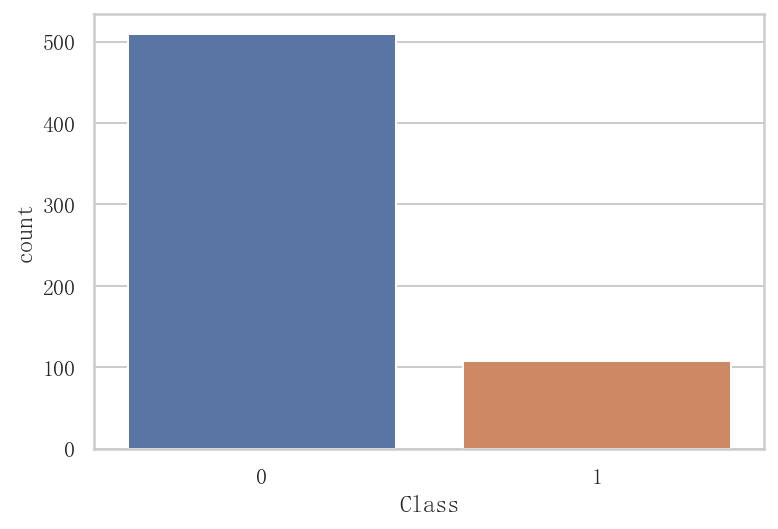

In [91]:
sns.countplot(x = train[target_col])

In [92]:
nan_cols = train.isna().sum()
nan_cols[nan_cols > 0]

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

In [93]:
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()
train.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [94]:
train.describe

<bound method NDFrame.describe of            AB          AF          AH          AM         AR        AX  \
0    0.209377  3109.03329   85.200147   22.394407   8.138688  0.699861   
1    0.145282   978.76416   85.200147   36.968889   8.138688  3.632190   
2    0.470030  2635.10654   85.200147   32.360553   8.138688  6.732840   
3    0.252107  3819.65177  120.201618   77.112203   8.138688  3.685344   
4    0.380297  3733.04844   85.200147   14.103738   8.138688  3.942255   
..        ...         ...         ...         ...        ...       ...   
612  0.149555  3130.05946  123.763599    9.513984  13.020852  3.499305   
613  0.435846  5462.03438   85.200147   46.551007  15.973224  5.979825   
614  0.427300  2459.10720  130.138587   55.355778  10.005552  8.070549   
615  0.363205  1263.53524   85.200147   23.685856   8.138688  7.981959   
616  0.482849  2672.53426  546.663930  112.006102   8.138688  3.198099   

           AY         AZ          BC          BD  ...         FL        FR  \

In [95]:
cat_features = ['EJ']
num_features = [col for col in train.columns if col not in cat_features and col != target_col]

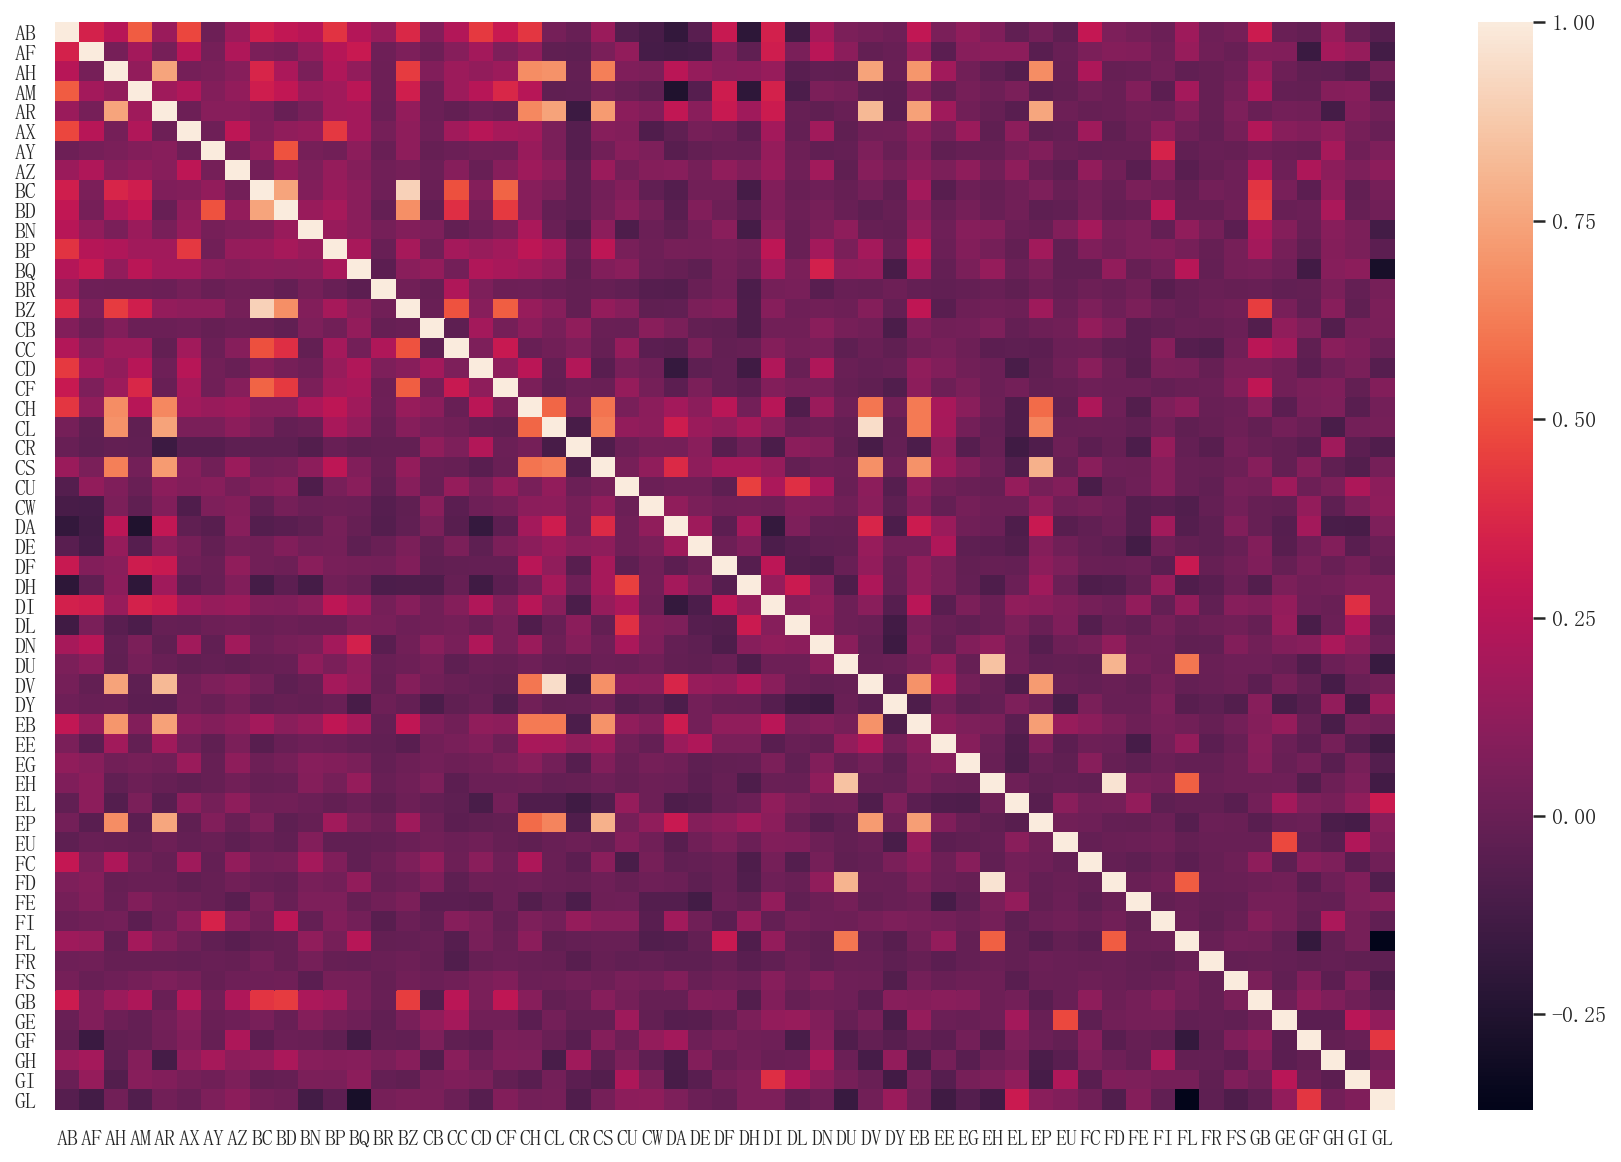

In [96]:
corr = train[num_features].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

这里面有相关系数几乎为1的 挑出来看一看

# DV&CL  

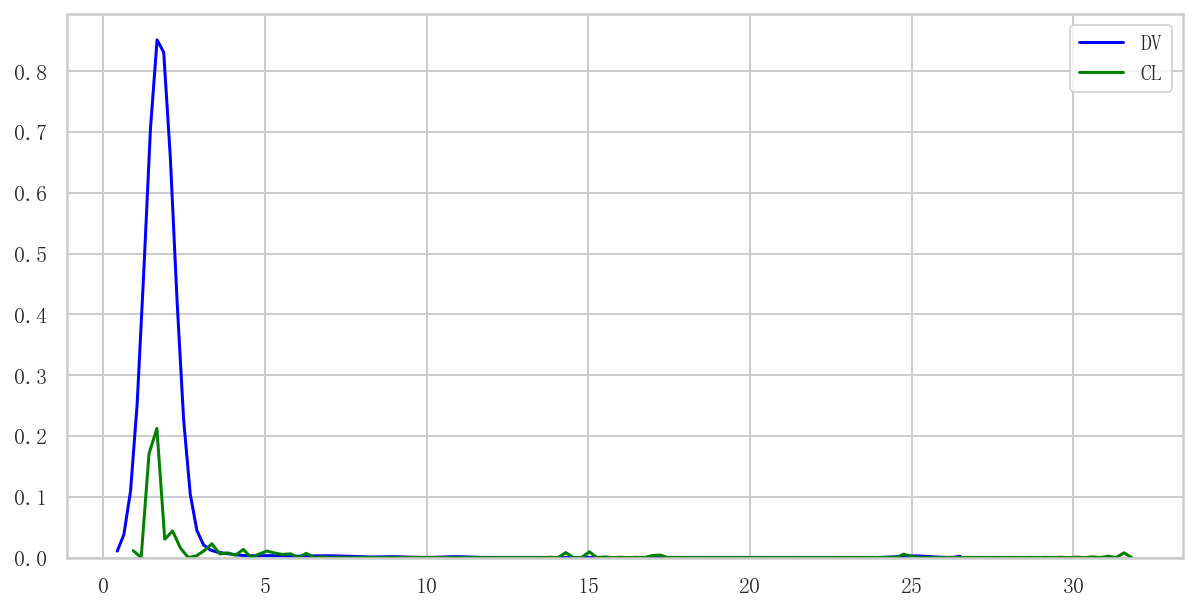

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.kdeplot(train['DV'], color = 'blue', label = 'DV')
sns.kdeplot(train['CL'], color = 'green', label = 'CL')
plt.legend()

# FD&EH

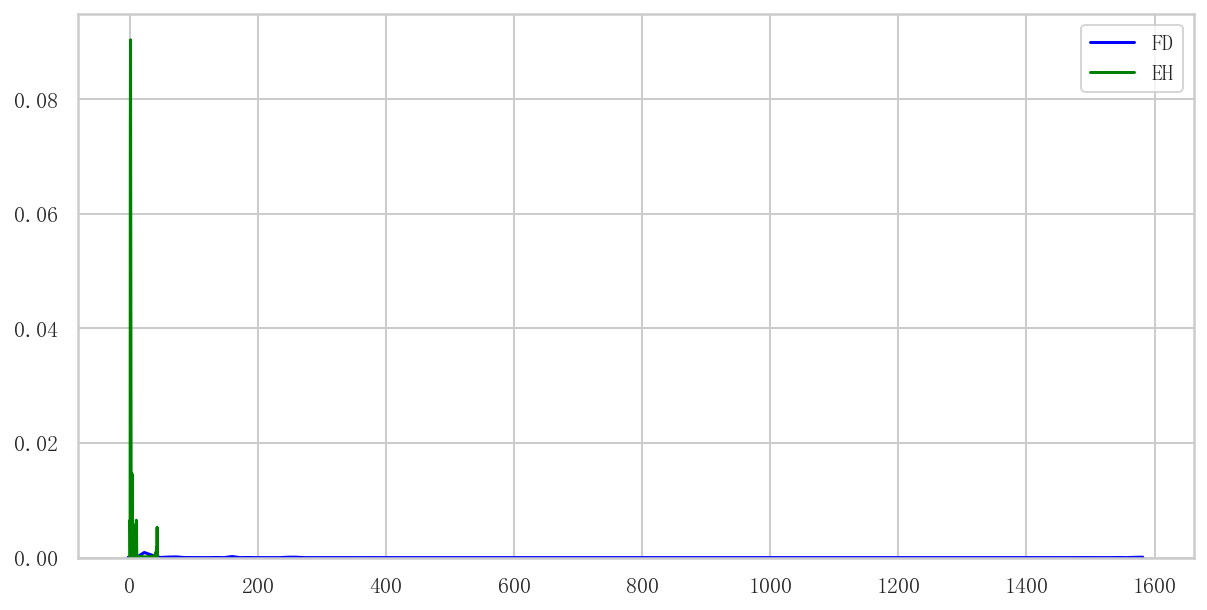

In [98]:
plt.figure(figsize=(10, 5))
sns.kdeplot(train['FD'], color = 'blue', label = 'FD')
sns.kdeplot(train['EH'], color = 'green', label = 'EH')
plt.legend()

# BZ&BC

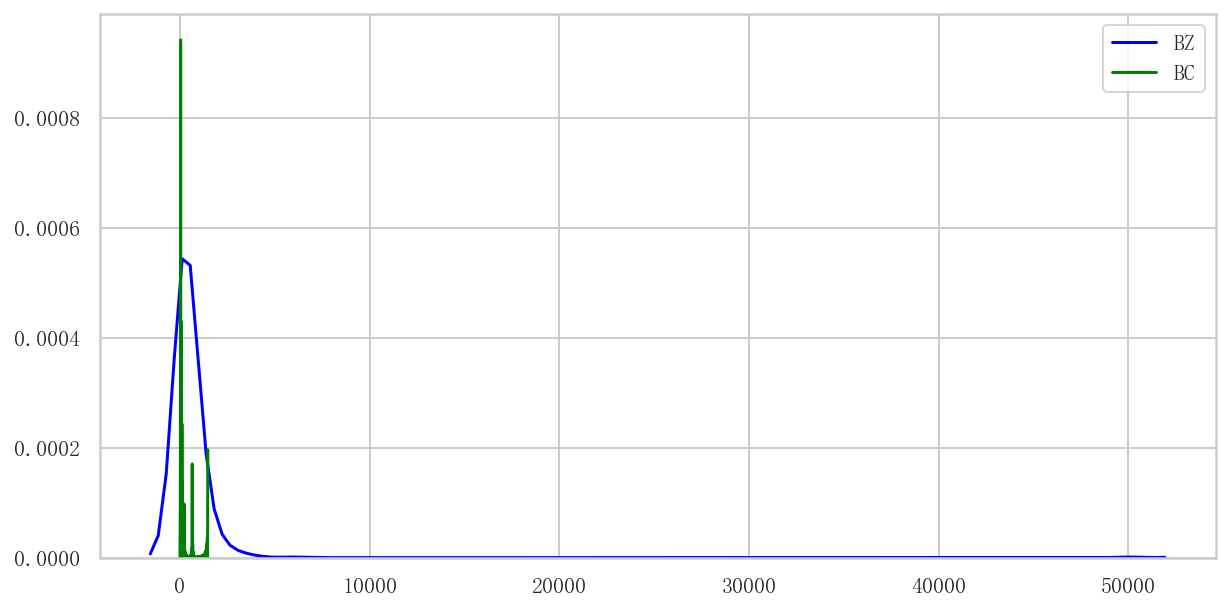

In [99]:
plt.figure(figsize=(10, 5))
sns.kdeplot(train['BZ'], color = 'blue', label = 'BZ')
sns.kdeplot(train['BC'], color = 'green', label = 'BC')
plt.legend()

In [100]:
cols_to_drop = ['DV', 'EH']

train = train.drop(columns = cols_to_drop)
test = test.drop(columns = cols_to_drop)

num_features = [feat for feat in num_features if feat not in cols_to_drop]

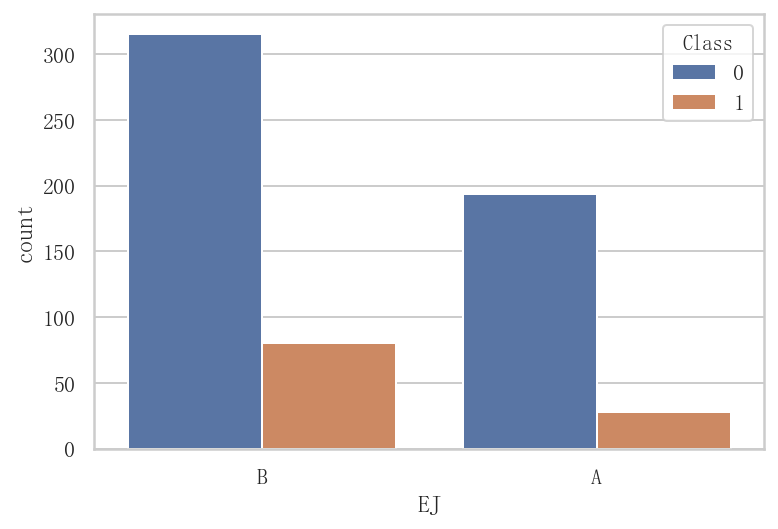

In [101]:
sns.countplot(x = train[cat_features[0]], hue = train[target_col])

In [105]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, axes = plt.subplots(len(num_features), 1, figsize=(14, 4 * len(num_features)))

# Iterate over each feature
for i, col in enumerate(num_features):
    # Select the subplot for the current feature
    ax = axes[i]

    # Plot histogram for class 0
    ax.hist(train.loc[train[target_col] == 0, col], density=True, bins=30, color='blue', alpha=0.5, label='0')

    # Plot histogram for class 1
    ax.hist(train.loc[train[target_col] == 1, col], density=True, bins=30, color='red', alpha=0.5, label='1')

    # Set the labels and title for the subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.set_title(f'{col}')

    # Add legend
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


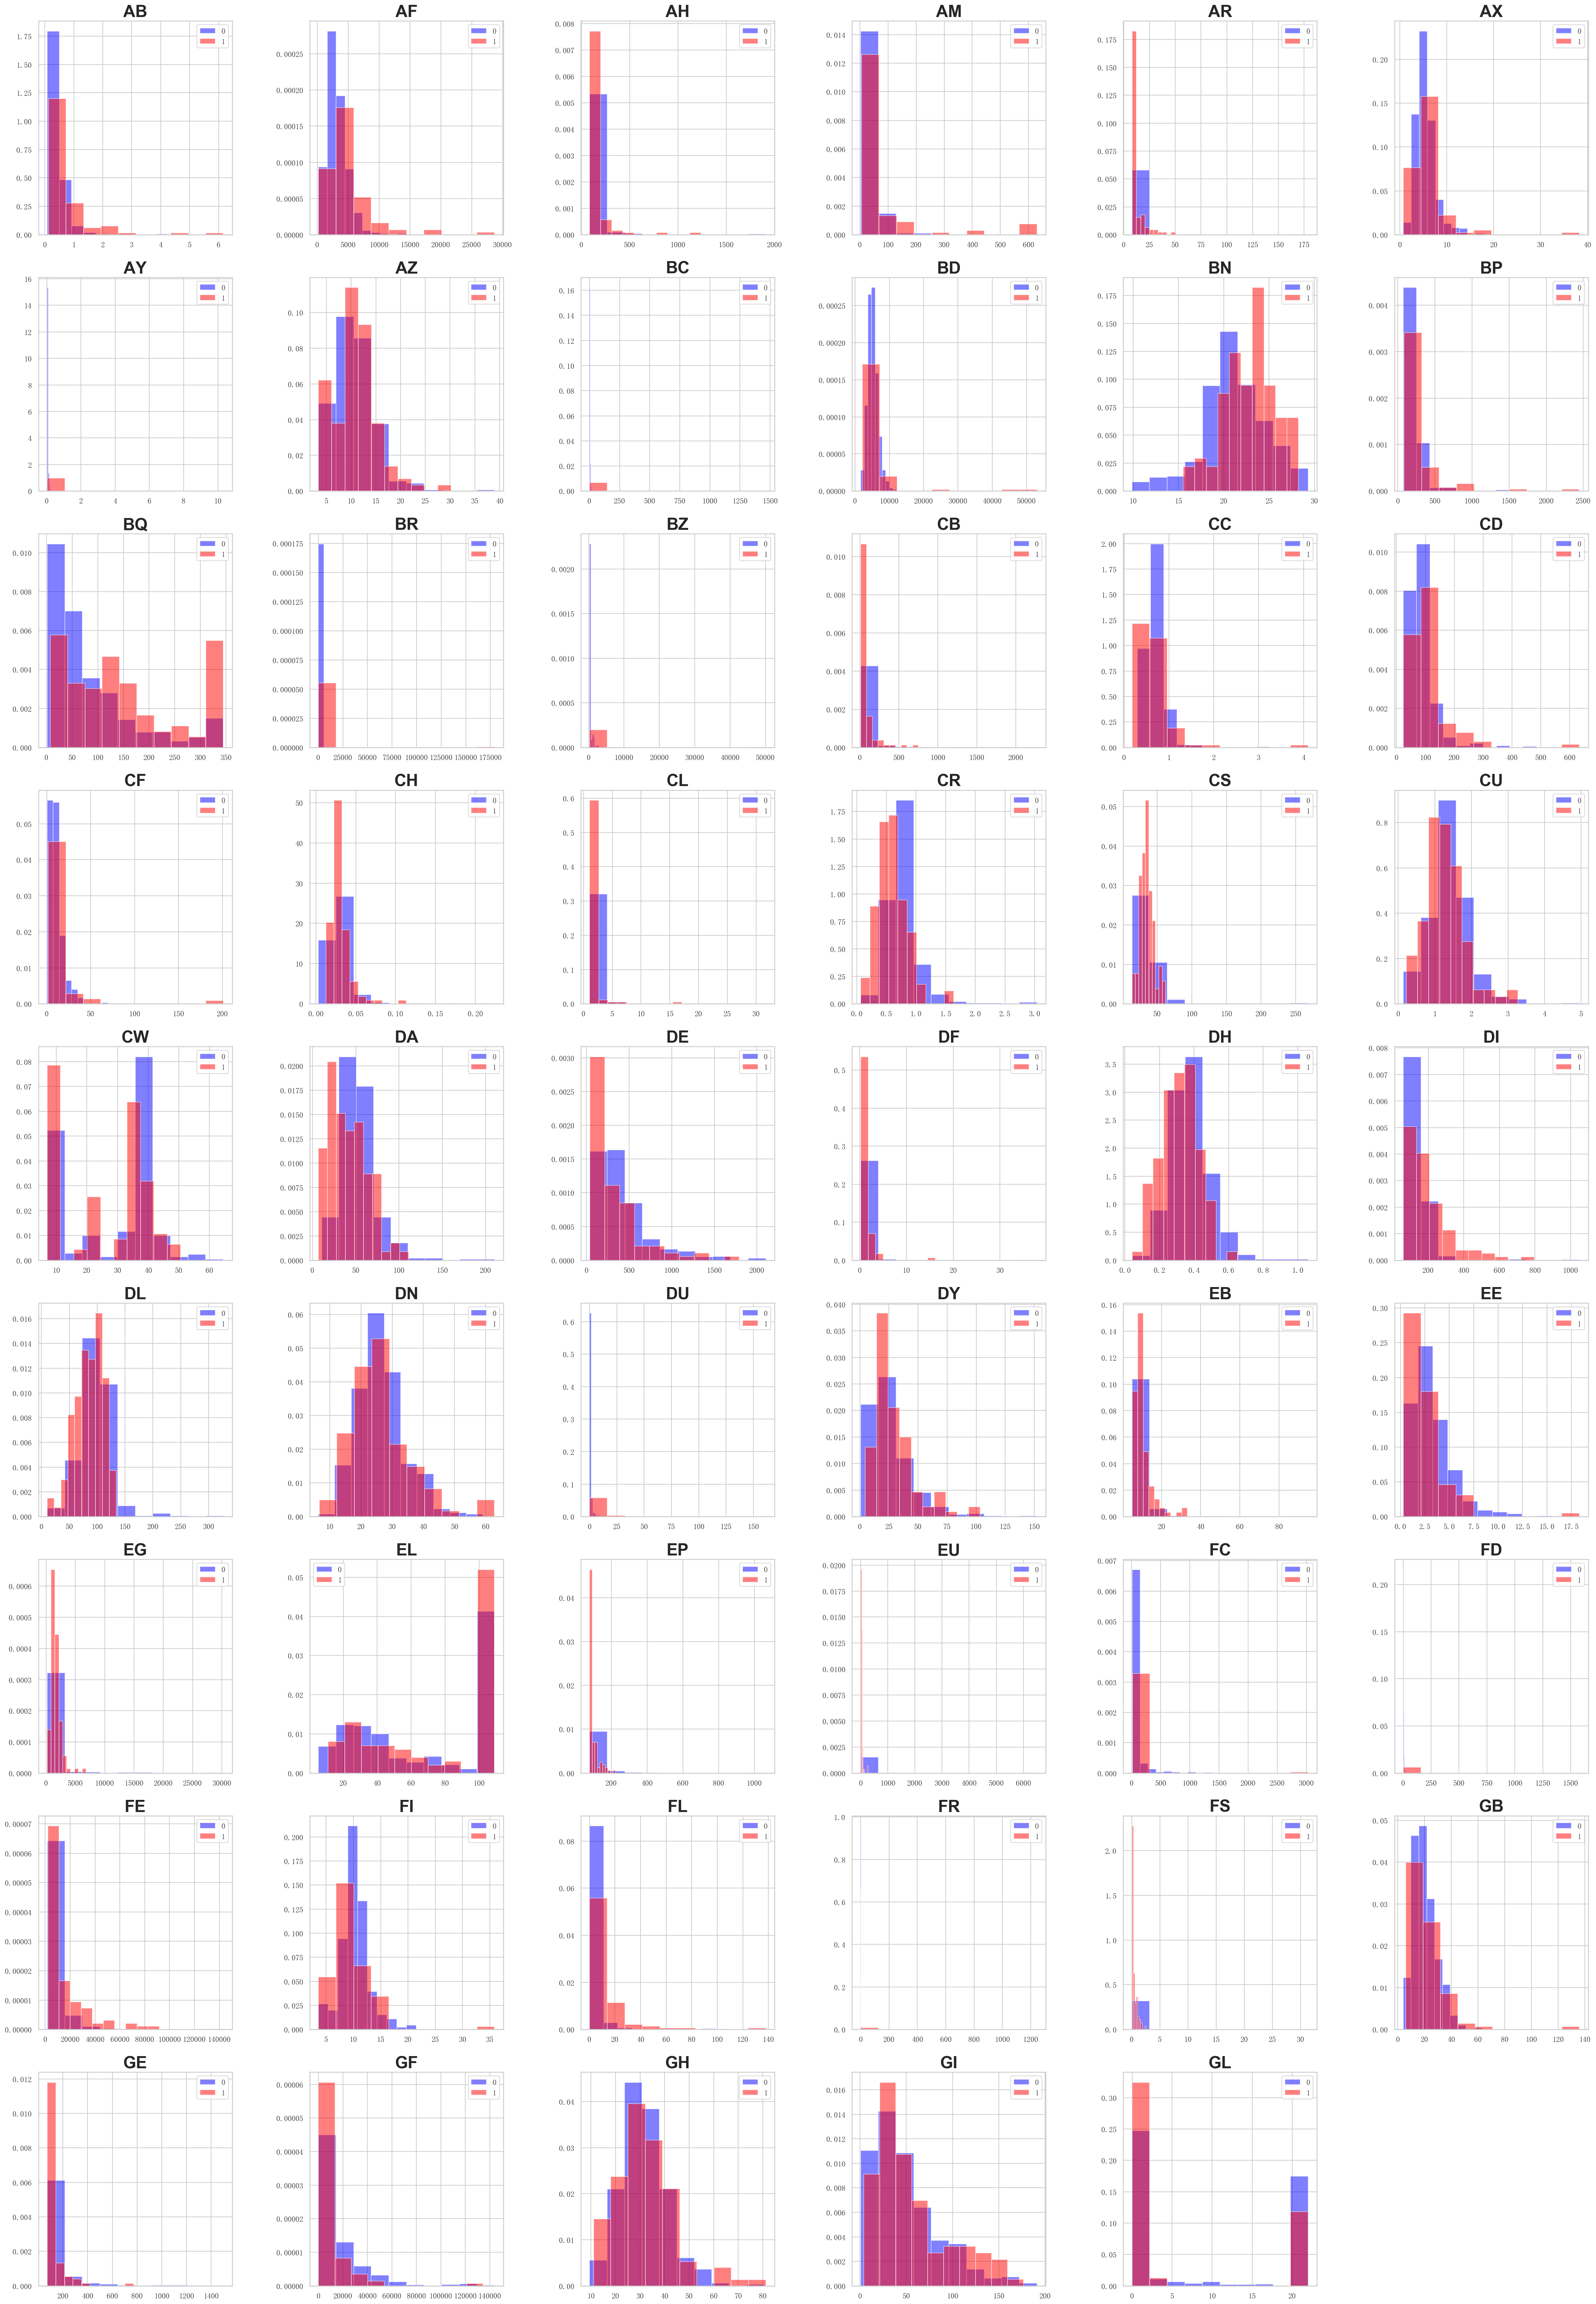

In [138]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(40,60))
i=1
for col in num_features:
    ax=fig.add_subplot(9,6,i)
    ax.hist(train.loc[train[target_col] == 0, col], density=True, color='blue', label='0', alpha=0.5)
    ax.hist(train.loc[train[target_col] == 1, col], density=True, color='red', label='1', alpha=0.5)
    i=i+1
    #ax.set_xlabel(col)
    plt.title(col, fontweight='bold', fontfamily='Arial', fontsize=24)
    ax.legend()
    

plt.subplots_adjust(wspace=0.4)
plt.show()


In [173]:
log1p_cols = ['AX', 'BD', 'BP', 'CC', 'CD', 'CF', 'CR', 'CS', 'CU', 'DE', 'EE', 'EG', 'FC', 'FE', 'FI', 'GB', 'GF']
sqrt_cols = ['DA', 'DH', 'DL', 'DN', 'GH', 'GI']

In [175]:
y = train.pop(target_col)

In [176]:
train[log1p_cols] = train[log1p_cols].apply(np.log1p)
train[sqrt_cols] = train[sqrt_cols].apply(np.sqrt)

test[log1p_cols] = test[log1p_cols].apply(np.log1p)
test[sqrt_cols] = test[sqrt_cols].apply(np.sqrt)

In [177]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
num_feat_train_matrix = sc.fit_transform(train[num_features])
num_feat_test_matrix = sc.transform(test[num_features])

In [202]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', drop = 'first',sparse = False)
cat_feat_train_matrix = ohe.fit_transform(train[cat_features])
cat_feat_test_matrix = ohe.transform(test[cat_features])

In [203]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
num_feat_train_matrix = imputer.fit_transform(num_feat_train_matrix)
num_feat_test_matrix = imputer.transform(num_feat_test_matrix)

In [204]:
print(num_feat_train_matrix.shape, cat_feat_train_matrix.shape)

(617, 53) (617, 1)


In [205]:
final_train_matrix = np.hstack([num_feat_train_matrix, cat_feat_train_matrix])
final_test_matrix = np.hstack([num_feat_test_matrix, cat_feat_test_matrix])
print(final_train_matrix.shape, final_test_matrix.shape)

(617, 54) (5, 54)


In [206]:
from sklearn.ensemble import IsolationForest

outliers_pred = IsolationForest(random_state = 42).fit_predict(final_train_matrix)
np.sum(outliers_pred == -1)

16

In [207]:
y.iloc[outliers_pred == -1]

10     1
52     0
134    1
156    0
184    0
229    1
232    1
330    1
331    0
356    0
378    1
385    0
387    1
433    1
511    1
585    1
Name: Class, dtype: int64

In [210]:
final_train_matrix = final_train_matrix[outliers_pred == 1, ...]
y = y.iloc[outliers_pred == 1]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 601 but corresponding boolean dimension is 617

In [214]:
final_train_matrix

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-3.899745,-0.083417,-0.173502,-0.038354,-0.598002,...,0.162355,-0.035806,-0.250462,-1.149987,-0.410260,-0.819140,-0.969449,0.683506,-0.815091,1.0
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.872747,-0.083417,0.678919,-0.104787,0.281949,...,-0.457909,-0.060566,0.113034,-1.585989,-0.410260,0.974516,-0.169346,-0.406430,1.303181,0.0
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.674584,-0.083417,0.519453,-0.104787,0.073394,...,0.198170,-0.051023,0.595966,1.559328,-0.299210,0.487461,-0.289525,-0.299459,-0.807668,1.0
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.838296,-0.083417,0.112088,-0.104787,-0.566124,...,0.059978,-0.060566,-0.105064,-0.046034,-0.342195,-0.789113,0.896333,1.152230,-0.811652,1.0
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.677108,-0.013229,-1.649292,1.445139,0.408712,...,0.236779,0.896815,-0.229691,-0.322432,0.099920,0.165792,1.376841,-0.263170,-0.817391,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,-0.699975,-0.161828,0.040232,-0.422762,0.275215,-0.960635,0.040875,-0.464891,-0.080610,-0.574964,...,-0.457909,-0.045332,-0.271234,-1.663269,0.593022,0.130708,-0.670338,0.667871,1.303181,0.0
597,-0.088253,0.852755,-0.261669,0.108831,0.556117,0.365230,-0.082686,0.473063,-0.065661,0.368454,...,0.416992,-0.045702,0.003985,1.483553,2.535523,-0.525581,-0.114653,1.824867,-0.812668,1.0
598,-0.106514,-0.453742,0.090140,0.235206,-0.011673,1.156365,-0.083417,1.113828,-0.104787,0.493325,...,-0.457909,-0.060566,-0.271234,0.124156,-0.019561,-0.021327,-0.495534,1.728587,1.303181,0.0
599,-0.243466,-0.973904,-0.261669,-0.219353,-0.189295,1.126730,-0.083417,-0.699741,-0.104787,-0.320006,...,0.332883,-0.054771,0.190927,0.604205,-0.410260,-0.832323,-0.615198,-0.233307,-0.808862,1.0


In [213]:
from sklearn.linear_model import LassoCV
import pandas as pd
from sklearn.linear_model import Lasso

# 提取特征和标签
final_train_matrix=pd.DataFrame(final_train_matrix)

# 使用LassoCV选择特征
lasso = LassoCV(cv=5)
lasso.fit(final_train_matrix, y)

# 输出选择的特征
selected_features = final_train_matrix.columns[lasso.coef_ != 0]
print("Selected features:", list(selected_features))

Selected features: [0, 1, 3, 10, 12, 13, 16, 17, 21, 25, 26, 28, 29, 30, 31, 32, 35, 42, 43, 44, 45, 48, 49]


In [215]:
final_train_matrix=final_train_matrix[[0, 1, 3, 10, 12, 13, 16, 17, 21, 25, 26, 28, 29, 30, 31, 32, 35, 42, 43, 44, 45, 48, 49]]

In [216]:
import numpy as np
import optuna

import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(final_train_matrix,y, random_state=42)
def objective(trial):
    
    
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    auc = sklearn.metrics.roc_auc_score(valid_y, pred_labels)
    return auc

if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective, n_trials=500)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-06-18 17:01:13,226] A new study created in memory with name: no-name-16e0f40c-bbb7-4387-b125-f3ff280c225d
[I 2023-06-18 17:01:13,305] Trial 0 finished with value: 0.7684615384615384 and parameters: {'lambda_l1': 0.003590821640308589, 'lambda_l2': 0.00018074373096822155, 'num_leaves': 86, 'feature_fraction': 0.8875507469733905, 'bagging_fraction': 0.42697040513376894, 'bagging_freq': 7, 'min_child_samples': 67}. Best is trial 0 with value: 0.7684615384615384.
[I 2023-06-18 17:01:13,377] Trial 1 finished with value: 0.7692307692307692 and parameters: {'lambda_l1': 7.744329687397202e-05, 'lambda_l2': 2.7513001326425703, 'num_leaves': 96, 'feature_fraction': 0.6602043504238285, 'bagging_fraction': 0.7881392272661556, 'bagging_freq': 6, 'min_child_samples': 14}. Best is trial 1 with value: 0.7692307692307692.
[I 2023-06-18 17:01:13,444] Trial 2 finished with value: 0.8189230769230769 and parameters: {'lambda_l1': 2.537427850159625e-05, 'lambda_l2': 1.0363170266398012e-05, 'num_leave

[I 2023-06-18 17:01:17,137] Trial 53 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:17,218] Trial 54 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:17,292] Trial 55 pruned. Trial was pruned at iteration 11.
[I 2023-06-18 17:01:17,361] Trial 56 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:17,485] Trial 57 pruned. Trial was pruned at iteration 90.
[I 2023-06-18 17:01:17,552] Trial 58 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:17,618] Trial 59 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:17,780] Trial 60 finished with value: 0.8269230769230769 and parameters: {'lambda_l1': 2.0485136391023887e-07, 'lambda_l2': 0.00011170771447069911, 'num_leaves': 129, 'feature_fraction': 0.6882992786197912, 'bagging_fraction': 0.599746941916984, 'bagging_freq': 7, 'min_child_samples': 9}. Best is trial 26 with value: 0.8461538461538461.
[I 2023-06-18 17:01:17,938] Trial 61 finished with value: 0.8076923076923077 and paramet

[I 2023-06-18 17:01:22,522] Trial 115 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:22,594] Trial 116 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:22,665] Trial 117 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:22,753] Trial 118 pruned. Trial was pruned at iteration 23.
[I 2023-06-18 17:01:22,827] Trial 119 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:22,920] Trial 120 pruned. Trial was pruned at iteration 29.
[I 2023-06-18 17:01:22,991] Trial 121 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,062] Trial 122 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,136] Trial 123 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,208] Trial 124 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,287] Trial 125 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,358] Trial 126 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:23,498] Trial 127 pr

[I 2023-06-18 17:01:28,826] Trial 185 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:28,910] Trial 186 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:28,990] Trial 187 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:29,088] Trial 188 pruned. Trial was pruned at iteration 11.
[I 2023-06-18 17:01:29,184] Trial 189 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:29,365] Trial 190 finished with value: 0.7692307692307692 and parameters: {'lambda_l1': 4.229208128072307e-06, 'lambda_l2': 0.000267920849902212, 'num_leaves': 132, 'feature_fraction': 0.6694409875779277, 'bagging_fraction': 0.6852276706537204, 'bagging_freq': 5, 'min_child_samples': 12}. Best is trial 26 with value: 0.8461538461538461.
[I 2023-06-18 17:01:29,449] Trial 191 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:29,531] Trial 192 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:29,618] Trial 193 pruned. Trial was pruned at iteration 10.
[

[I 2023-06-18 17:01:36,290] Trial 262 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,378] Trial 263 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,471] Trial 264 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,563] Trial 265 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,658] Trial 266 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,756] Trial 267 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,846] Trial 268 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:36,938] Trial 269 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:37,032] Trial 270 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:37,125] Trial 271 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:37,216] Trial 272 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:37,308] Trial 273 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:37,403] Trial 274 pr

[I 2023-06-18 17:01:44,804] Trial 345 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:44,909] Trial 346 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,019] Trial 347 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,121] Trial 348 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,224] Trial 349 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,325] Trial 350 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,425] Trial 351 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,531] Trial 352 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,635] Trial 353 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,745] Trial 354 pruned. Trial was pruned at iteration 18.
[I 2023-06-18 17:01:45,849] Trial 355 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:45,954] Trial 356 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:46,057] Trial 357 pr

[I 2023-06-18 17:01:54,626] Trial 431 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:54,740] Trial 432 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:54,858] Trial 433 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:54,970] Trial 434 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,088] Trial 435 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,202] Trial 436 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,318] Trial 437 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,434] Trial 438 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,550] Trial 439 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,668] Trial 440 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:55,788] Trial 441 pruned. Trial was pruned at iteration 10.
[I 2023-06-18 17:01:56,022] Trial 442 finished with value: 0.75 and parameters: {'lambda_l1': 1.6167121420788687e-07, 'l

Number of finished trials: 500
Best trial:
  Value: 0.8461538461538461
  Params: 
    lambda_l1: 0.00022376905595623787
    lambda_l2: 0.0005893632372659798
    num_leaves: 145
    feature_fraction: 0.49645579077101304
    bagging_fraction: 0.5477722369018357
    bagging_freq: 7
    min_child_samples: 18


In [217]:
model=lgb.LGBMClassifier(lambda_l1=0.00022376905595623787,
    lambda_l2= 0.0005893632372659798,
    num_leaves= 145,
    feature_fraction= 0.49645579077101304,
    bagging_fraction= 0.5477722369018357,
    bagging_freq= 7,
    min_child_samples= 18).fit(train_x,train_y)

In [222]:
final_test_matrix=pd.DataFrame(final_test_matrix)
final_test_matrix=final_test_matrix[[0, 1, 3, 10, 12, 13, 16, 17, 21, 25, 26, 28, 29, 30, 31, 32, 35, 42, 43, 44, 45, 48, 49]]

In [224]:
test_pred=model.predict_proba(final_test_matrix)
test_pred

array([[0.65080554, 0.34919446],
       [0.65080554, 0.34919446],
       [0.65080554, 0.34919446],
       [0.65080554, 0.34919446],
       [0.65080554, 0.34919446]])